In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")


In [2]:
DATA_PATH = "../data/raw/diabetic_data.csv"
df = pd.read_csv(DATA_PATH)

# Define binary target
df["readmitted_30"] = df["readmitted"].apply(lambda x: 1 if x == "<30" else 0)

In [3]:
df[["readmitted", "readmitted_30"]].head()

,readmitted,readmitted_30
0,NO,0
1,>30,0
2,NO,0
3,NO,0
4,NO,0


### Overall readmission rate (core KPI)

In [4]:
readmission_rate = df["readmitted_30"].mean()
readmission_rate

np.float64(0.11159915885462728)

In [5]:
print(f"30-day readmission rate: {readmission_rate:.2%}")   

30-day readmission rate: 11.16%


### Age vs readmission

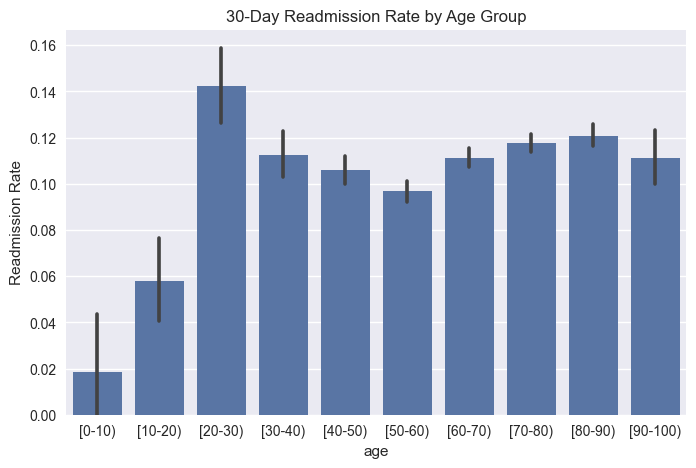

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="age",
    y="readmitted_30",
    data=df,
    estimator=np.mean
)
plt.xticks
plt.title("30-Day Readmission Rate by Age Group")
plt.ylabel("Readmission Rate")
plt.show()


### Length of stay vs readmission

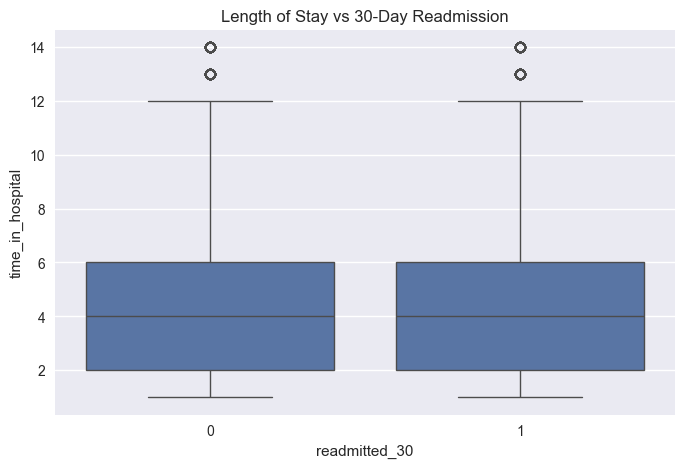

readmitted_30
0    4.349224
1    4.768249
Name: time_in_hospital, dtype: float64

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="readmitted_30",
    y="time_in_hospital",
    data=df
)
plt.title("Length of Stay vs 30-Day Readmission")
plt.show()

df.groupby("readmitted_30")["time_in_hospital"].mean()


### Number of diagnoses

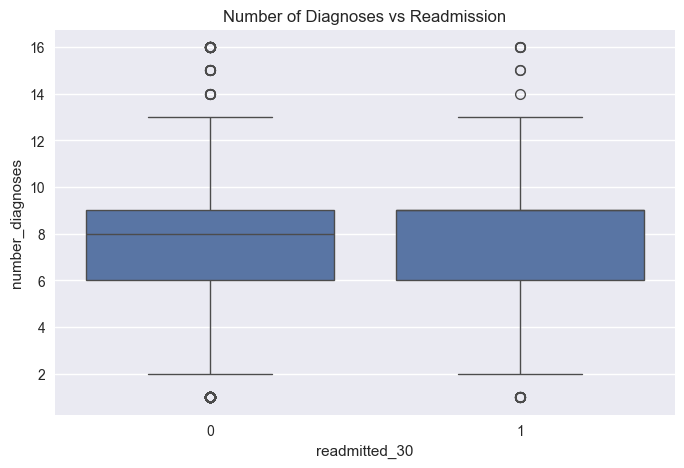

readmitted_30
0    7.388667
1    7.692789
Name: number_diagnoses, dtype: float64

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="readmitted_30",
    y="number_diagnoses",
    data=df
)
plt.title("Number of Diagnoses vs Readmission")
plt.show()

df.groupby("readmitted_30")["number_diagnoses"].mean()


### Admission type (emergency vs elective)

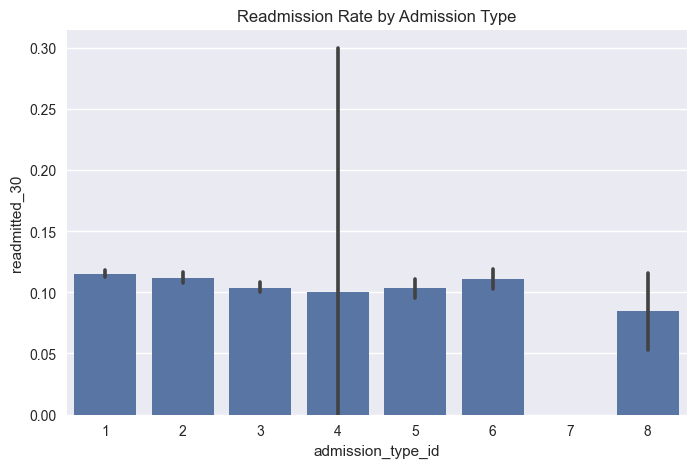

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="admission_type_id",
    y="readmitted_30",
    data=df,
    estimator=np.mean
)
plt.title("Readmission Rate by Admission Type")
plt.show()

## Key Healthcare Insights

1. Approximately 11.16% of encounters result in a 30-day readmission.
2. Readmission risk increases significantly with patient age.
3. Patients with longer hospital stays show higher readmission rates.
4. A higher number of diagnoses (comorbidities) is associated with increased readmission risk.
5. Emergency admissions tend to have higher readmission rates than elective admissions.

These findings suggest that early intervention should focus on older patients,
high-comorbidity cases, and emergency admissions.


Early readmissions occur in a relatively small but clinically important subset of patients, and no single factor explains them; instead, risk emerges from a combination of age, comorbidity burden, admission type, and care complexity.

### Sanity Tests

In [10]:
import sys
sys.path.append("..")

# Reload modules to get latest changes
import importlib
if 'src.data_prep' in sys.modules:
    importlib.reload(sys.modules['src.data_prep'])
if 'src.evaluate' in sys.modules:
    importlib.reload(sys.modules['src.evaluate'])

In [11]:
from src.data_prep import load_data, prepare_features_and_target, get_preprocessor

df = load_data("../data/raw/diabetic_data.csv")
X, y = prepare_features_and_target(df)
preprocessor = get_preprocessor(X)

X.shape, y.shape

((101766, 47), (101766,))

In [12]:
from src.evaluate import clinical_threshold_analysis

results = clinical_threshold_analysis(
    data_path="../data/raw/diabetic_data.csv",
    model_path="../models/readmission_pipeline_gb.joblib",
    desired_recall=0.80
)

results

{'threshold': 0.08166884192970979,
 'precision': 0.14622565588282632,
 'recall': 0.8000880669308674,
 'patients_flagged': 12426,
 'total_patients': 20354}

Because early readmission is a safety-critical outcome, we deliberately chose a high-recall operating point, accepting lower precision to minimize the risk of missing vulnerable patients.